In [ ]:
# 현재 위치 확인

%pwd

In [ ]:
!python -m pip install --upgrade pip

In [1]:
# 수집된 데이터를 분석하기 위해 먼저 pandas를 임포트합니다.

import pandas as pd
import numpy as np

In [3]:
# 데이터를 수집합니다
df = pd.read_csv("d:/basketball_stat.csv")

In [4]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [6]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다

df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [7]:
# 시각화 모듈 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'STL and 2P in 2D plane')

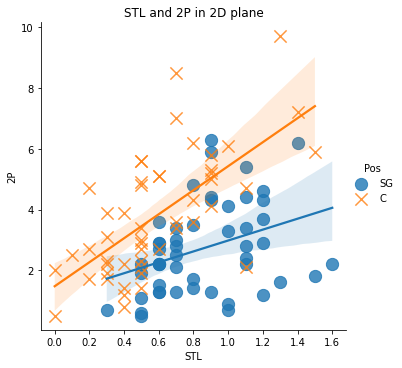

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2점슛, 스틸 데이터 시각화

sns.lmplot(x = 'STL', y = '2P', data = df, 
          fit_reg = True,            # 결정경계 보이기
          scatter_kws = {'s' : 150}, # 좌표 상의 점의 크기
          markers = ['o', 'x'],      # 마커 모양
          hue='Pos')                 # 예측값

# 챠트 제목 생성
plt.title('STL and 2P in 2D plane')

Text(0.5, 1.0, 'STL and 2P in 2D plane')

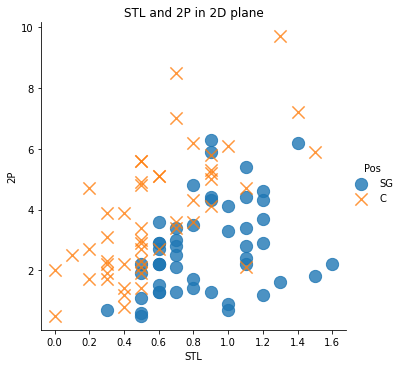

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2점슛, 스틸 데이터 시각화

sns.lmplot(x = 'STL', y = '2P', data = df, 
          fit_reg = False,            # 결정경계 숨기기
          scatter_kws = {'s' : 150},  # 좌표 상의 점의 크기
          markers = ['o', 'x'],       # 마커 모양
          hue='Pos')                  # 예측값

# 챠트 제목 생성
plt.title('STL and 2P in 2D plane')

Text(0.5, 1.0, 'AST and 2P in 2d plane')

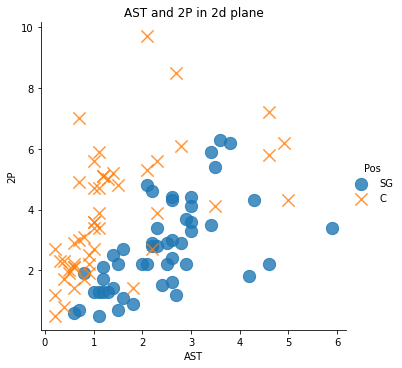

In [10]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot(x = 'AST', y = '2P', 
           data=df, 
           fit_reg=False,           # 결정경계 숨기기
           scatter_kws={"s": 150},  # 좌표 상의 점의 크기
           markers=["o", "x"],      # 마커 모양
           hue="Pos")               # 예측값

# title
plt.title('AST and 2P in 2d plane')

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

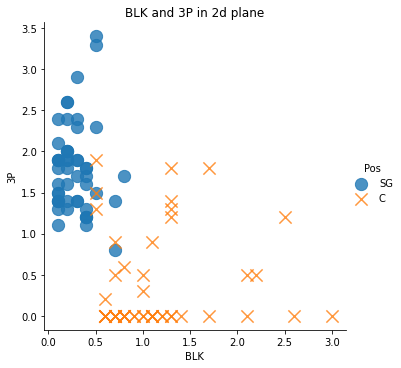

In [11]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x = 'BLK', y = '3P', 
           data=df, 
           fit_reg=False,           # 결정경계 숨기기
           scatter_kws={"s": 150},  # 좌표 상의 점의 크기
           markers=["o", "x"],      # 마커 모양
           hue="Pos")               # 예측값

# title
plt.title('BLK and 3P in 2d plane')

Text(0.5, 1.0, 'TRB and 3P in 2d plane')

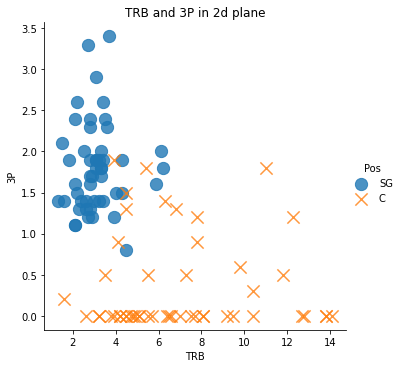

In [12]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot(x = 'TRB', y = '3P', 
           data=df, 
           fit_reg=False,             # 결정경계 숨기기
           scatter_kws={"s": 150},    # 좌표 상의 점의 크기
           markers=["o", "x"],        # 마커 모양
           hue="Pos")                 # 예측값

# title
plt.title('TRB and 3P in 2d plane')

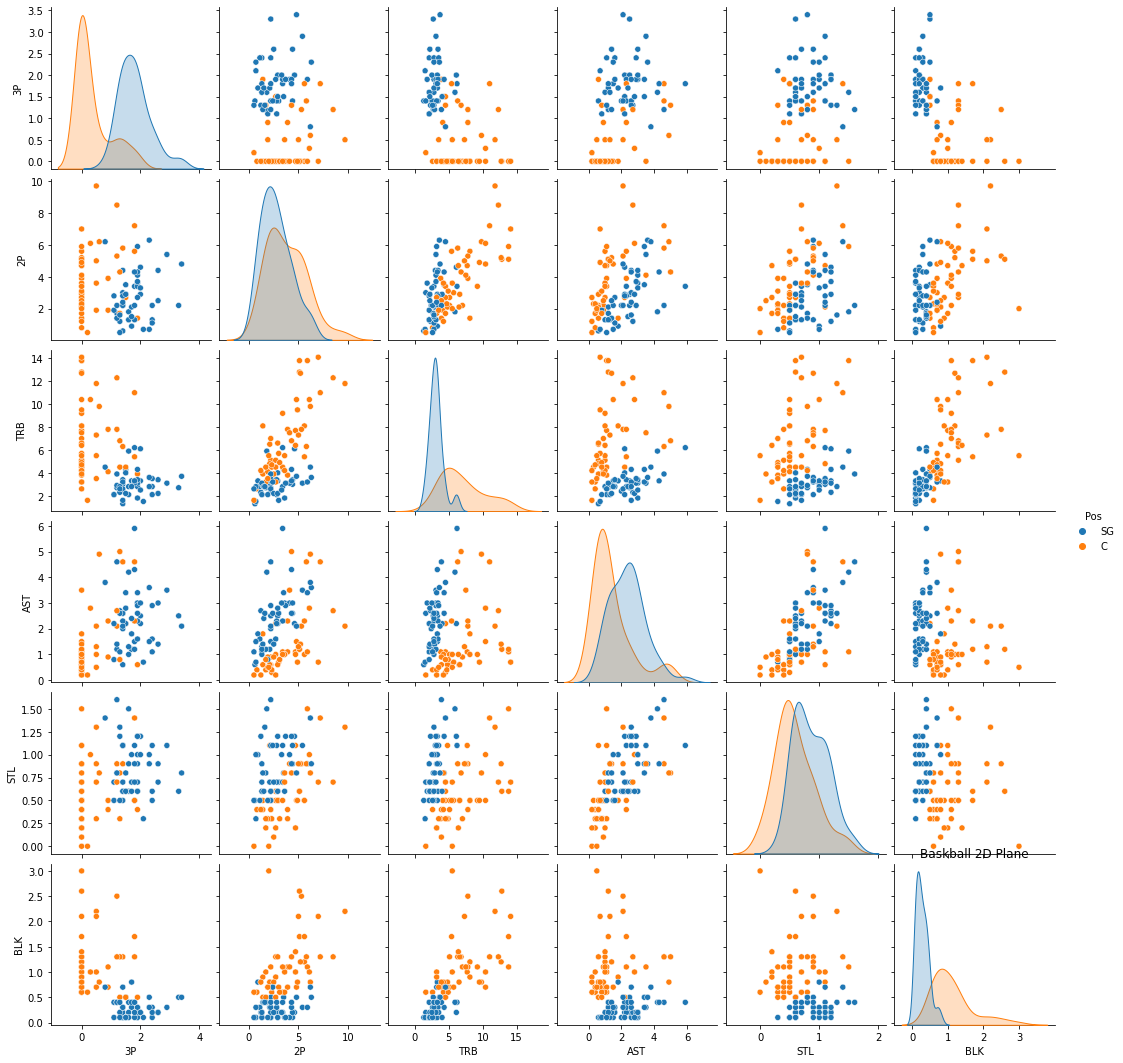

In [13]:
sns.pairplot(data=df, hue='Pos')
plt.title("Baskball 2D Plane")
plt.show()

In [14]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다
# axis=1 옵션을 사용하면 데이터프레임을 좌우 행 방향으로 작업한다.
# axis=0 옵션을 사용하면 데이터프레임을 위아래 열 방향으로 작업한다.
# inplace = True 옵션은 즉시 적용한다는 의미

df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True)

In [15]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [16]:
# sklearn의 train_test_split을 사용하면 
# 라인 한줄로 손쉽게 데이터를 나눌 수 있다

from sklearn.model_selection import train_test_split


# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [17]:
# 학습 데이터의 갯수를 확인합니다, 80개의 데이터가 있습니다.
train.shape[0]

80

In [18]:
# 테스트 데이터의 갯수를 확인합니다. 20개의 데이터가 있습니다.

test.shape[0]

20

In [19]:
# 다듬어진 데이터를 파일로 저장하기
# pickle.dump  --> 데이터를 백업하는 경우
# pickle.load  --> 백업된 데이터를 불러오는 경우(단, dump된 파일만 가능)

import pickle
with open('basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
    
with open('basketball_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [ ]:
a = [1, 2, 3, 4, 5]

In [20]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 그래프 출력을 위해 선언합니다.
%matplotlib inline

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

In [26]:
#%%writefile d:/python/경고.txt
# 파일로 저장하기
import warnings
warnings.filterwarnings(action='ignore')

In [27]:
# 실습에 필요한 kNN 라이브러리를 임포트합니다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행하기 위해 데이터의 중간값을 찾는다.
max_k_range = train.shape[0] // 2
k_list = []

# k의 범위를 3부터 학습 데이터 절반까지 지정
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = [ ]
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.95,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.9375,
 0.925,
 0.9375,
 0.925,
 0.9375,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.85,
 0.85,
 0.85]

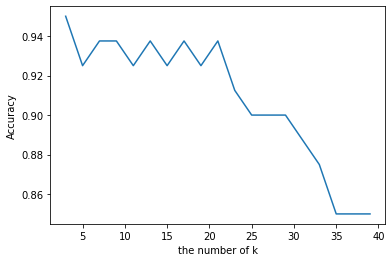

In [28]:
# k에 따른 정확도를 시각화

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

### 예측율이 가장 높은 K 선정

In [30]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]

print("The Best Number of K: " + str(k))

The Best Number of K: 3


# 검증 테스트(3P, BLK)

In [35]:
# 모듈 호출
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용할 속성값 선언 : 80개 데이터
x_train = train[['3P', 'BLK']]

# 예측 대상을 포지션으로 지정 : 80개 정답
y_train = train[['Pos']]

# 학습시킬 모델 알고리즘 선택 : Knn
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성 지정 : 20개의 데이터
x_test = test[['3P', 'BLK']]

# 테스트 데이터에 대한 정답 : 20개의 데이터
y_test = test[['Pos']]

# 예측시작
predict = knn.predict(x_test)

In [36]:
print(predict)

['SG' 'C' 'SG' 'C' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'SG' 'SG'
 'SG' 'SG' 'SG' 'C' 'SG']


- 위의 결과에 대한 정확도를 계산한다

In [37]:
print("정확도 : " + str(accuracy_score(y_test.values.ravel(), predict)))

정확도 : 0.9


## 실제값과 예측값 비교

In [40]:
comparison = pd.DataFrame(
{'prediction' : predict, 
 'ground_truth' : y_test.values.ravel()}
)

comparison

# ground_truth : 실제값, prediction : 예측값

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,C,C
6,SG,SG
7,SG,SG
8,SG,SG
9,C,C


# 3개의 특징으로 예측하기 : 3P, BLK, TRB

In [45]:
# 모듈 호출
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용할 속성값 선언 : 80개 데이터
x_train = train[['3P', 'BLK', 'TRB']]

# 예측 대상을 포지션으로 지정 : 80개 정답
y_train = train[['Pos']]

# 학습시킬 모델 알고리즘 선택 : Knn
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성 지정 : 20개의 데이터
x_test = test[['3P', 'BLK', 'TRB']]

# 테스트 데이터에 대한 정답 : 20개의 데이터
y_test = test[['Pos']]

# 예측시작
predict = knn.predict(x_test)
print(predict)

comparison = pd.DataFrame(
{'prediction' : predict, 
 'ground_truth' : y_test.values.ravel()}
)

print('---------------------------------------------------------------')
print(comparison)
print('---------------------------------------------------------------')
print("정확도 : " + str(accuracy_score(y_test.values.ravel(), predict)))

['SG' 'C' 'SG' 'C' 'SG' 'C' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG'
 'SG' 'SG' 'SG' 'C' 'SG']
---------------------------------------------------------------
   prediction ground_truth
0          SG           SG
1           C            C
2          SG           SG
3           C            C
4          SG           SG
5           C            C
6          SG           SG
7          SG           SG
8          SG           SG
9          SG            C
10         SG           SG
11         SG           SG
12         SG            C
13         SG           SG
14         SG           SG
15         SG           SG
16         SG           SG
17         SG           SG
18          C           SG
19         SG           SG
---------------------------------------------------------------
정확도 : 0.85
